## Linear regression with statsmodels (OLS)

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as eval_measures
import scipy.stats as stats
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn import datasets, model_selection, metrics

We load the boston house-prices dataset and `X` are our features and `y` is the target variable `medv` (Median value of owner-occupied homes in $1000s).

In [2]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Let's split the data in a test and training set.

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

## Fitting models - the standard way
### Full model without an intercept


In [4]:
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              576.5
Date:                Tue, 09 Mar 2021   Prob (F-statistic):                   4.44e-223
Time:                        11:10:31   Log-Likelihood:                         -1078.6
No. Observations:                 354   AIC:                                      2183.
Df Residuals:                     341   BIC:                                      2234.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

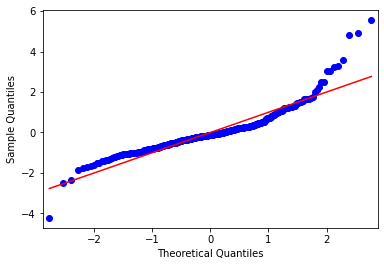

In [5]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [6]:
result.pvalues < 0.05

CRIM        True
ZN          True
INDUS      False
CHAS        True
NOX        False
RM          True
AGE        False
DIS         True
RAD         True
TAX         True
PTRATIO     True
B           True
LSTAT       True
dtype: bool

In [7]:
predicted = result.predict(X_test)

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.7703149625381717
mse: 21.349246500709384
rmse: 4.620524483292929
mae: 3.3364825756054635


### Full model with an intercept


In [8]:
model = sm.OLS(y_train, sm.add_constant(X_train))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     67.00
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.94e-85
Time:                        11:10:31   Log-Likelihood:                -1054.5
No. Observations:                 354   AIC:                             2137.
Df Residuals:                     340   BIC:                             2191.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.3151      6.434      7.043      0.0

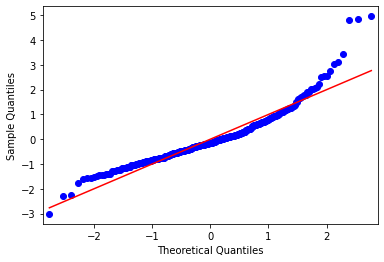

In [9]:
fig = sm.qqplot(result.resid, fit=True, line="s")
plt.show()

In [10]:
predicted = result.predict(sm.add_constant(X_test))

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.7656376748264769
mse: 21.78400084698805
rmse: 4.6673333764568445
mae: 3.4715502697310314


## Fitting models using R-style formulas
We can also fit a model with the R syntax `y ~ x_1 + x_2` and build some complexer models.

In [11]:
dat = X_train.copy()
dat['MEDV'] = y_train
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36,23.1
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94,21.4
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88,24.0
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9


### Full model with an intercept

In [12]:
result = smf.ols('MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     47.79
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.16e-65
Time:                        11:10:31   Log-Likelihood:                -1104.8
No. Observations:                 354   AIC:                             2236.
Df Residuals:                     341   BIC:                             2286.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.4838      7.114      3.723      0.0

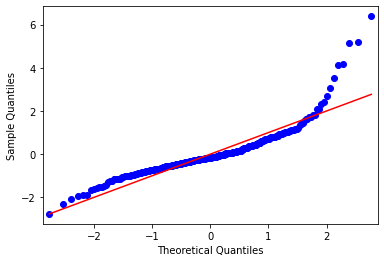

In [13]:
fig = sm.qqplot(result.resid, fit=True, line="s")

plt.show()

In [14]:
predicted = result.predict(X_test)

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.7897495353844631
mse: 19.542801070408228
rmse: 4.420724043684273
mae: 3.3748884978038487


### Model with a polynomial and the target variable log transformed

In [15]:
result = smf.ols('np.log(MEDV) ~ CRIM + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + pow(AGE, 2)', data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     58.26
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           7.00e-68
Time:                        11:10:32   Log-Likelihood:                 7.9891
No. Observations:                 354   AIC:                             6.022
Df Residuals:                     343   BIC:                             48.58
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3697      0.306     11.011      

Let's plot the QQ-Plot for the residuals

In [16]:
result.pvalues < 0.05

Intercept      True
CRIM           True
CHAS           True
NOX            True
RM             True
DIS            True
RAD            True
TAX            True
PTRATIO        True
B              True
pow(AGE, 2)    True
dtype: bool

In [17]:
predicted = np.exp(result.predict(X_test))

print("r2 score: {}".format(metrics.r2_score(y_test, predicted)))
print("mse: {}".format(metrics.mean_squared_error(y_test, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(y_test, predicted)))

r2 score: 0.8350907526996756
mse: 15.32833052499633
rmse: 3.9151411883859732
mae: 2.7878783583226427


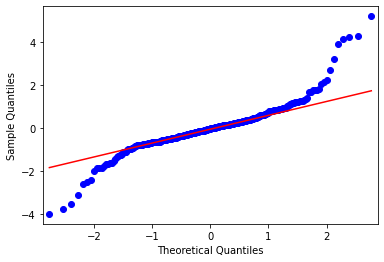

In [18]:
fig = sm.qqplot(result.resid, fit=True, line="q")
plt.show()